<a href="https://colab.research.google.com/github/Jungin1020/Aiffel_exp/blob/main/2022_01_11_exp3_sticker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


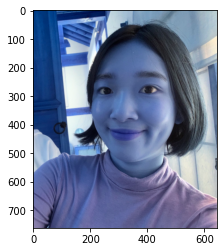

In [70]:
my_image_path = '/content/drive/MyDrive/aiffel/camera_sticker/images_2/image.png'
img_bgr = cv2.imread(my_image_path)
img_bgr2 = img_bgr.copy()
img_show = img_bgr.copy()
img_addwei = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

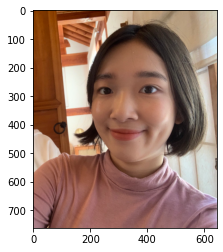

In [71]:
# detecting
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)# dlib은 rgb 이미지를 입력받음
dlib_rects = detector_hog(img_rgb, 1)
plt.imshow(img_rgb)
plt.show()

rectangles[[(170, 170) (491, 491)]]


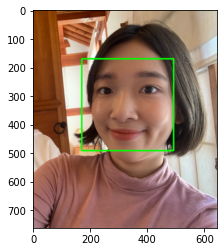

In [72]:
print(dlib_rects)

for dlib_rect in dlib_rects:
  l = dlib_rect.left()
  t = dlib_rect.top()
  r = dlib_rect.right()
  b = dlib_rect.bottom()

  cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA) # (img,start,end,color,thickness,linetype)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # 이미지 색상 표현 방식
plt.imshow(img_show_rgb)
plt.show()

In [73]:
model_path = '/content/drive/MyDrive/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [74]:
list_landmarks = [] #68개의 점 찍기

for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb,dlib_rect)
  list_points = list(map(lambda p: (p.x,p.y), points.parts()))
  list_landmarks.append(list_points)

  print(len(list_landmarks[0]))
  print(list_landmarks)

68
[[(208, 294), (204, 328), (206, 363), (215, 397), (226, 428), (242, 460), (261, 491), (284, 518), (317, 529), (356, 527), (394, 512), (430, 491), (463, 463), (484, 430), (494, 388), (498, 345), (500, 302), (209, 249), (221, 229), (244, 221), (269, 221), (294, 230), (352, 229), (382, 215), (415, 213), (447, 223), (470, 245), (318, 278), (315, 307), (311, 335), (308, 364), (281, 382), (297, 388), (314, 394), (333, 389), (352, 386), (230, 284), (245, 273), (265, 273), (283, 289), (263, 293), (243, 292), (372, 288), (393, 270), (415, 269), (435, 280), (417, 290), (393, 291), (261, 418), (280, 418), (299, 415), (313, 419), (330, 417), (360, 422), (394, 423), (361, 444), (332, 454), (314, 455), (298, 452), (280, 441), (271, 421), (298, 430), (313, 433), (330, 432), (384, 425), (331, 433), (314, 434), (299, 431)]]


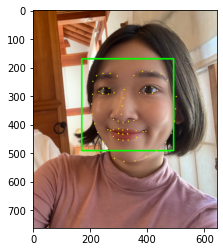

In [75]:
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_show, point, 2, (0, 255, 255), -1)


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [76]:
print(landmark[8])

(317, 529)


In [77]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  print (landmark[8])
  x = landmark[8][0]
  y = landmark[8][1]# - dlib_rect.height()//2
  w = h = dlib_rect.width()
  print('(x,y) : (%d,%d)'%(x,y))
  print('(w,h) : (%d,%d)'%(w,h))

(317, 529)
(x,y) : (317,529)
(w,h) : (322,322)


In [78]:
sticker_path = '/content/drive/MyDrive/aiffel/camera_sticker/images_2/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker,(w,h))
print(img_sticker.shape)

(322, 322, 3)


In [79]:
refined_x = x - w//2
refined_y = y - h
print('(x,y) : (%d,%d)'%(refined_x,refined_y))

(x,y) : (156,207)


In [80]:
if refined_x < 0:
  img_sticker = img_sticker[:,-refined_x:]
  refined_x = 0
if refined_y < 0:
  img_sticker = img_sticker[-refined_y:, :]
  refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x,refined_y))

(x,y) : (156,207)


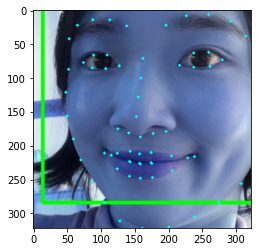

In [81]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0],refined_x:refined_x + img_sticker.shape[1]] # 스티커를 붙일 위치를 crop한 이미지
sticker_area2 = img_addwei[refined_y:refined_y + img_sticker.shape[0],refined_x:refined_x + img_sticker.shape[1]]
plt.imshow(sticker_area)
plt.show()

In [82]:
img_show[refined_y:refined_y + img_sticker.shape[0],refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

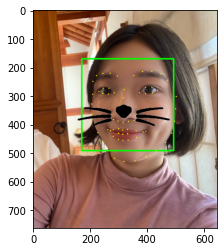

In [83]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

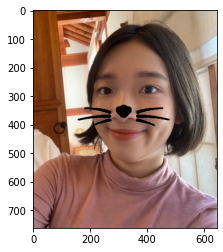

In [84]:
sticker_area = img_rgb[refined_y:refined_y + img_sticker.shape[0],refined_x:refined_x + img_sticker.shape[1]] # 스티커를 붙일 위치를 crop한 이미지
img_rgb[refined_y:refined_y + img_sticker.shape[0],refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
plt.imshow(img_rgb)
plt.show()

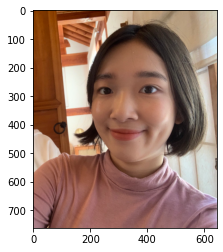

In [85]:
img_addwei = cv2.cvtColor(img_addwei, cv2.COLOR_BGR2RGB)
plt.imshow(img_addwei)
plt.show()

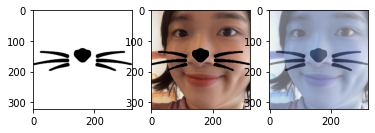

In [86]:
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


dst = cv2.addWeighted(sticker_area2, 0.6, img_sticker, 0.4, 0)

ax1.imshow(img_sticker)
ax2.imshow(sticker_area)
ax3.imshow(dst)

plt.show()

In [90]:
img_bgr2[refined_y:refined_y + img_sticker.shape[0],refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area, cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr2)
plt.show()

SyntaxError: ignored

addweight 부분에서 뭐가 뭔지 꼬여버렸습니다...ㅜㅜ
일단 마감이 다 돼서 제출하고 찬찬히 뜯어보려고 합니다
스티커 회전은 지금 제 실력으론 역부족이라 나중에 시도해보겠습니다